# 웹 크롤링

### 웹에서 데이터 크롤링 해오기

In [1]:
import pandas as pd

In [3]:
help(pd.read_html)
# HTML table 태그를 DataFrame 객체의 list로 읽어옴

Help on function read_html in module pandas.io.html:

read_html(io: 'FilePath | ReadBuffer[str]', match: 'str | Pattern' = '.+', flavor: 'str | None' = None, header: 'int | Sequence[int] | None' = None, index_col: 'int | Sequence[int] | None' = None, skiprows: 'int | Sequence[int] | slice | None' = None, attrs: 'dict[str, str] | None' = None, parse_dates: 'bool' = False, thousands: 'str | None' = ',', encoding: 'str | None' = None, decimal: 'str' = '.', converters: 'dict | None' = None, na_values=None, keep_default_na: 'bool' = True, displayed_only: 'bool' = True) -> 'list[DataFrame]'
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object, or file-like object
        String, path object (implementing ``os.PathLike[str]``), or file-like
        object implementing a string ``read()`` function.
        The string can represent a URL or the HTML itself. Note that
        lxml only accepts the http, ftp and file url proto

In [6]:
url = 'https://finance.naver.com/sise/lastsearch2.naver'

In [7]:
result = pd.read_html(url, encoding='euc-kr')

In [8]:
# 해당 url에 table 태그가 아래와 같이 2개가 존재하며
# read_html의 결과도 2개가 추출된 것을 확인
len(result)

2

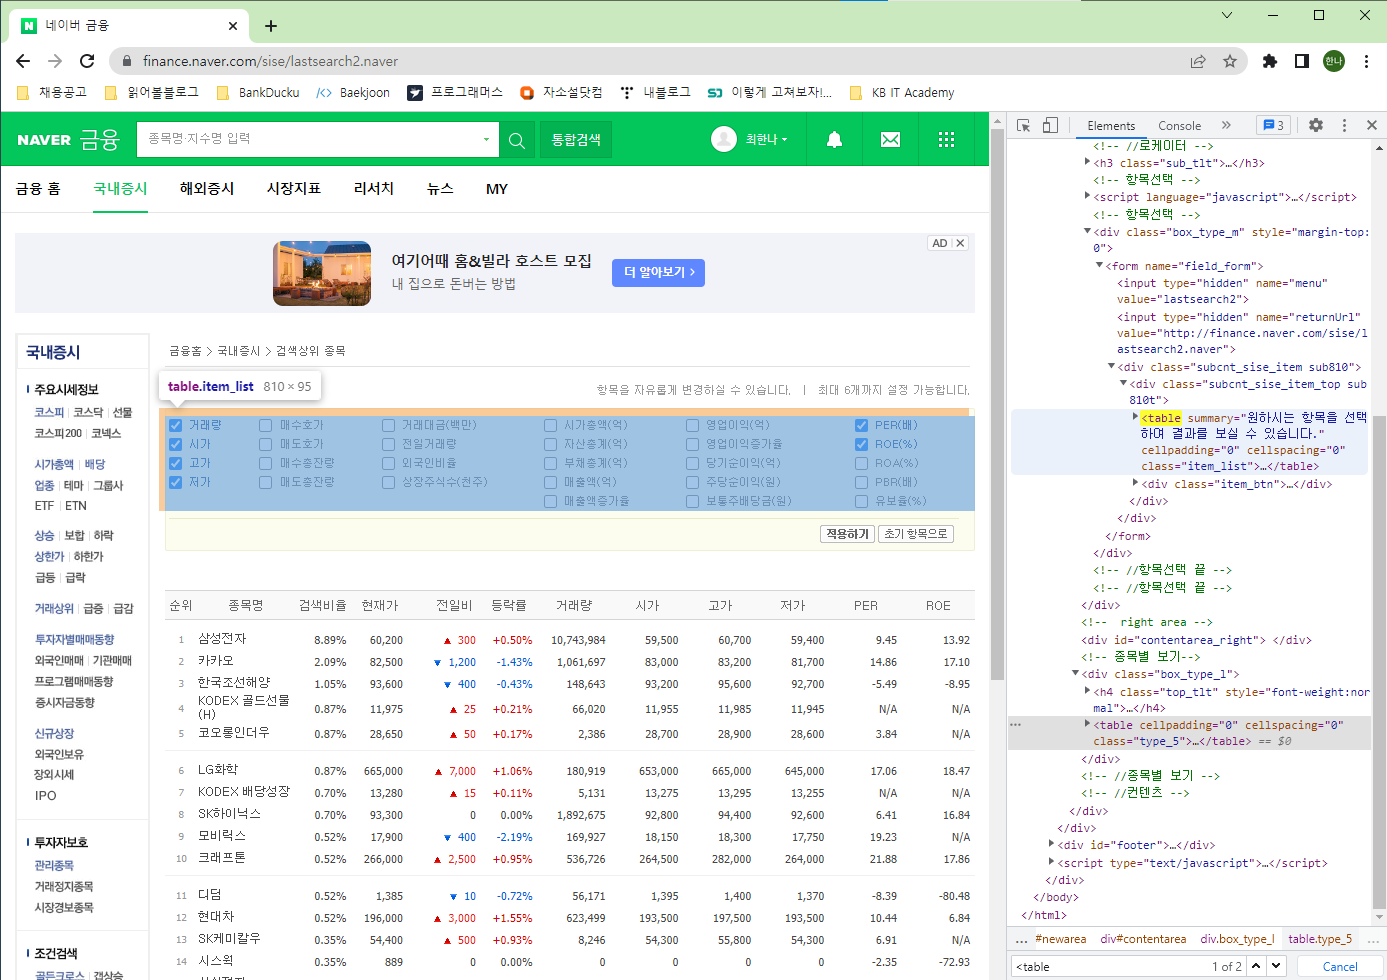
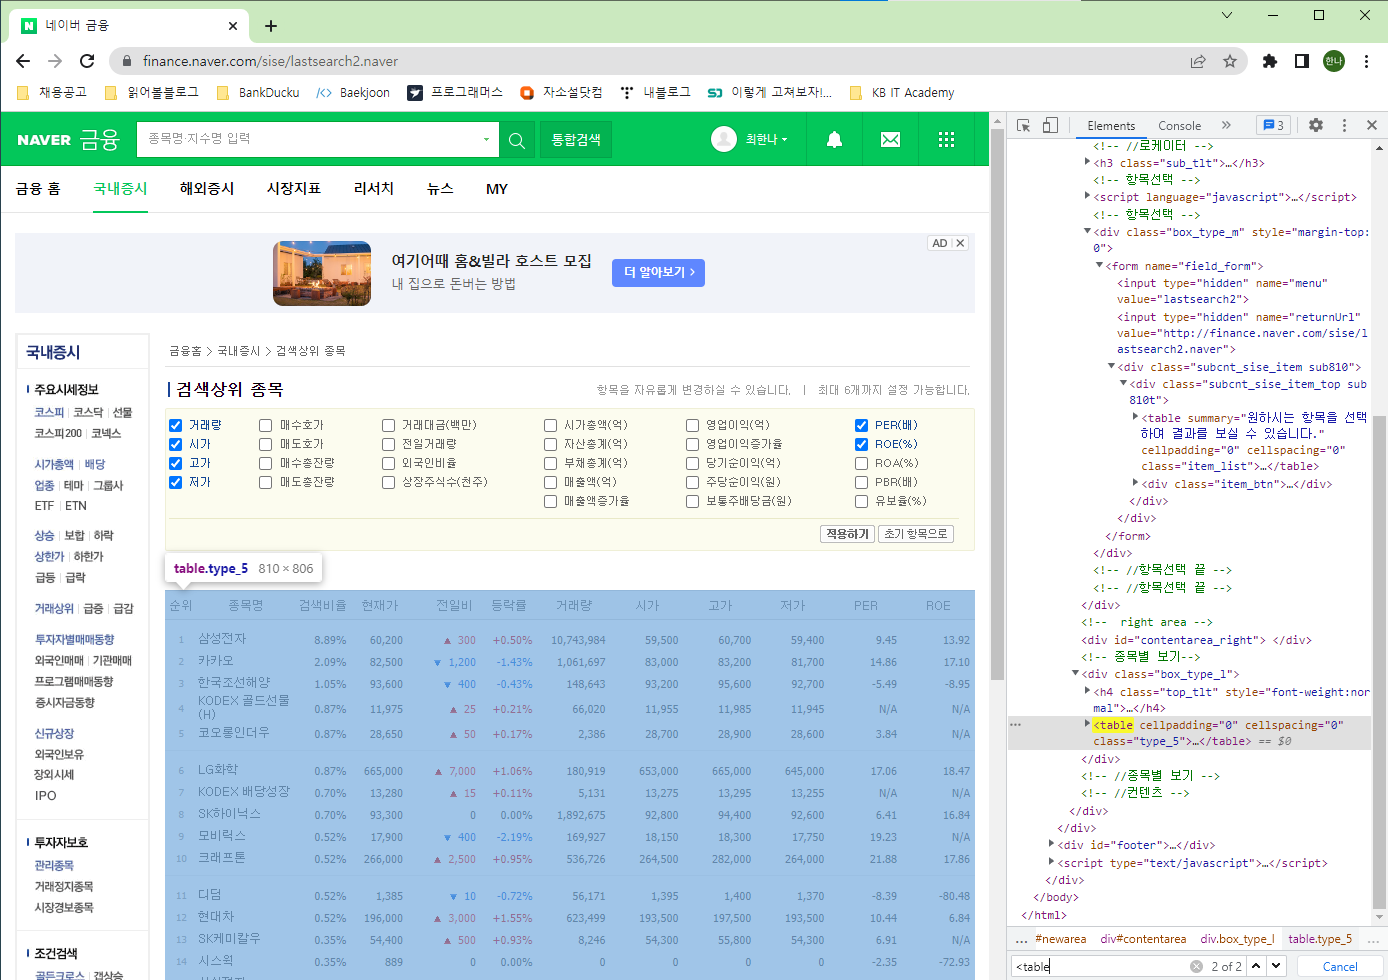

### 크롤링한 데이터 활용하기

In [10]:
# 두번째 테이블인 순위정보 테이블 내용 조회
result[1].head(20)

,순위,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,PER,ROE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,8.82%,60200.0,300.0,+0.50%,10743984.0,59500.0,60700.0,59400.0,9.45,13.92
2,2.0,코오롱인더우,2.15%,28650.0,50.0,+0.17%,2386.0,28700.0,28900.0,28600.0,3.84,NaN
3,3.0,카카오,1.72%,82500.0,1200.0,-1.43%,1061697.0,83000.0,83200.0,81700.0,14.86,17.10
4,4.0,KODEX 배당성장,1.51%,13280.0,15.0,+0.11%,5131.0,13275.0,13295.0,13255.0,NaN,NaN
5,5.0,KODEX 골드선물(H),1.29%,11975.0,25.0,+0.21%,66020.0,11955.0,11985.0,11945.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6.0,LG화학,1.08%,665000.0,7000.0,+1.06%,180919.0,653000.0,665000.0,645000.0,17.06,18.47


In [13]:
# 필요한 컬럼만 조회
# 순위, 종목명, 현재가만 표시
result[1][['순위','종목명','현재가']].head(20)

,순위,종목명,현재가
0,NaN,NaN,NaN
1,1.0,삼성전자,60200.0
2,2.0,코오롱인더우,28650.0
3,3.0,카카오,82500.0
4,4.0,KODEX 배당성장,13280.0
5,5.0,KODEX 골드선물(H),11975.0
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,6.0,LG화학,665000.0


In [17]:
# 테이블의 빈행까지 조회되는 경우가 발생
# 불필요한 결과값이 포함된 부분 제거하기
# how 옵션 : 행 또는 열을 제거할지 결정 (any, all 사용가능)
# - any : NA 값이 하나라도 있으면 해당 행이나 열을 삭제
# - all : 모든 값이 NA이면 해당 행이나 열을 삭제
result[1][['순위','종목명','현재가']].head(20).dropna(how='all')

,순위,종목명,현재가
1,1.0,삼성전자,60200.0
2,2.0,코오롱인더우,28650.0
3,3.0,카카오,82500.0
4,4.0,KODEX 배당성장,13280.0
5,5.0,KODEX 골드선물(H),11975.0
9,6.0,LG화학,665000.0
10,7.0,LG전자,101000.0
11,8.0,NAVER,265500.0
12,9.0,한국조선해양,93600.0
13,10.0,SK하이닉스,93300.0


In [16]:
help(result[1].dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset: 'IndexLabel' = None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
      

### 테이블 태그가 많은 페이지를 크롤링 하는 경우

In [21]:
# match : 해당 정규식 또는 문자열과 일치하는 텍스트가 포함된 테이블 세트가 반환됨
df = pd.read_html(url, match='순위',encoding='euc-kr')
len(df)

1

In [22]:
# 순위라는 텍스트가 포함된 2번째 테이블만 조회됨
df[0][['순위','종목명','현재가']].head(20).dropna(how='all')

,순위,종목명,현재가
1,1.0,삼성전자,60200.0
2,2.0,카카오,82500.0
3,3.0,KODEX 배당성장,13280.0
4,4.0,코오롱인더우,28650.0
5,5.0,LG화학,665000.0
9,6.0,KODEX 골드선물(H),11975.0
10,7.0,TIGER 200,33140.0
11,8.0,SK하이닉스,93300.0
12,9.0,ARIRANG 고배당주,11510.0
13,10.0,TIGER 200 IT,29145.0


참고 : https://ponyozzang.tistory.com/601